# **Analysis of the dataset**
This dataset contains information about sleep quality based on multiple factors, such as age, BMI, stress level, etc.

Based on informations and factors affecting sleep health, we can evaluate the following dataset by analyzing several differences:

**Basic Patterns**
1. What is the average sleep duration for different age groups?
2. How does BMI vary with sleep duration?
3. Is there a relationship between age and sleep duration?

**Correlations & Relationships**
1. Does sleep duration correlate with BMI?
2. How does physical activity level affect sleep quality?
3. Is there a trend between sleep duration and stress levels?

**Comparisons & Group Differences**
1. Do males and females have different sleep patterns?
2. How does sleep duration differ among different BMI categories (underweight, normal, overweight, obese)?
3. Are there significant differences in sleep duration based on occupation or lifestyle factors?

**Advanced Analysis**
1. Can we predict sleep quality based on other factors (e.g., BMI, exercise, diet)?
2. Are there specific clusters of people with similar sleep habits (using clustering techniques)?
3. Does poor sleep correlate with specific health conditions (e.g., high blood pressure, diabetes)?

To begin the analysis, we'll need to clean the dataset, handle missing values, and ensure the data types are correct. Then, we'll use various visualization techniques to explore the relationships between sleep quality factors and sleep duration. Finally, we'll perform the advanced analysis to predict sleep quality based on other factors.

Let's start by importing the necessary libraries and loading the dataset.

## Import libraries

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Preview dataset

In [95]:
sleep_health = pd.read_csv('sleep_health_lifestyle_dataset.csv')
sleep_health.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia
5,6,Female,47,Student,6.1,6.9,24,4,Normal,123/60,87,9485,NaN
6,7,Male,22,Office Worker,5.1,6.1,26,6,Obese,121/70,66,15680,NaN
7,8,Male,49,Office Worker,10.7,6.2,49,8,Obese,134/87,59,18767,NaN
8,9,Male,25,Manual Labor,11.9,7.2,27,8,Underweight,112/63,99,16397,Sleep Apnea
9,10,Female,51,Retired,8.2,4.0,64,5,Overweight,125/84,76,12744,NaN


## Data cleaning

In [96]:
# Drop rows with any missing values
sleep_health_cleaned = sleep_health.dropna()

# Remove duplicate rows
sleep_health_cleaned = sleep_health_cleaned.drop_duplicates()

# Convert data types if necessary (example: converting 'Age' column to integer)
# sleep_health_cleaned['Age'] = sleep_health_cleaned['Age'].astype(int)

# Display the cleaned dataset
sleep_health_cleaned.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia
8,9,Male,25,Manual Labor,11.9,7.2,27,8,Underweight,112/63,99,16397,Sleep Apnea
12,13,Male,54,Office Worker,4.1,6.8,113,9,Obese,137/90,70,15440,Sleep Apnea
18,19,Female,26,Manual Labor,9.2,6.4,93,9,Underweight,113/65,78,9957,Sleep Apnea
19,20,Male,27,Manual Labor,10.6,8.1,94,8,Normal,113/63,58,17796,Insomnia
21,22,Male,45,Office Worker,4.1,5.1,41,8,Normal,122/77,75,12627,Insomnia
23,24,Female,52,Manual Labor,11.2,5.9,55,10,Overweight,126/78,77,6933,Insomnia
24,25,Female,40,Office Worker,11.0,5.7,30,4,Overweight,120/77,66,16295,Insomnia
26,27,Female,36,Retired,8.8,7.3,41,6,Overweight,118/71,90,2203,Insomnia
31,32,Male,47,Retired,7.1,6.8,56,2,Underweight,123/74,89,3093,Insomnia


Starting from basic patterns:

We can now start by calculating the average duration for sleeping of each group of age, varying from 18 years old to above 65 years old, and hence predicting the cause of its difference.
#### Adult age group's average sleep duration:

In [97]:
adult_age = sleep_health_cleaned.loc[(sleep_health_cleaned['Age'] >= 18) & (sleep_health_cleaned['Age'] < 25)]
adult_age.head(10)
adult_mean_sleep = adult_age['Sleep Duration (hours)'].mean()
adult_mean_sleep = float("{:.2f}".format(adult_mean_sleep))
adult_mean_sleep

7.66

We repeat the same step for middle-aged group and senior age group:

#### Middle-aged age group's average sleep duration:

In [98]:
middled_age = sleep_health_cleaned.loc[(sleep_health_cleaned['Age'] >= 25) & (sleep_health_cleaned['Age'] < 60)]
middled_age.head(10)
middled_mean_sleep = middled_age['Sleep Duration (hours)'].mean()
middled_mean_sleep = float("{:.2f}".format(middled_mean_sleep))
middled_mean_sleep

8.24

#### Senior age group's average sleep duration:

In [99]:
senior_age = sleep_health_cleaned.loc[(sleep_health_cleaned['Age'] >= 60)]
senior_age.head(10)
senior_mean_sleep = senior_age['Sleep Duration (hours)'].mean()
senior_mean_sleep = float("{:.2f}".format(senior_mean_sleep))
senior_mean_sleep

7.87

It can be depicted that the sleep duration of the senior age group is the highest. Shorter sleep duration for the age group between 18 - 50 can be caused by the quantity of workload, since this is the main age group of workers worldwide, and in the US in particular. 

In addition, the adult age group (18 - 25) are known to be more active in social activities than the two other age groups, thus spending less time for sleeping. In contrary, most of the population in the senior age group had retirement, and according to reports, elder people are likely to rest sooner, since they don't have much time working (or don't have to). This would be a factor affecting higher sleep duration in this age group.

Now, let's examine how BMI affects sleep duration. We will create a scatter plot to visualize this relationship:

#### BMI vs Sleep Duration:

C:\Users\Huy Hung\AppData\Local\Temp\ipykernel_16964\4060444978.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=sleep_health_cleaned, x='BMI Category', y='Sleep Duration (hours)',


<Axes: xlabel='BMI Category', ylabel='Sleep Duration (hours)'>

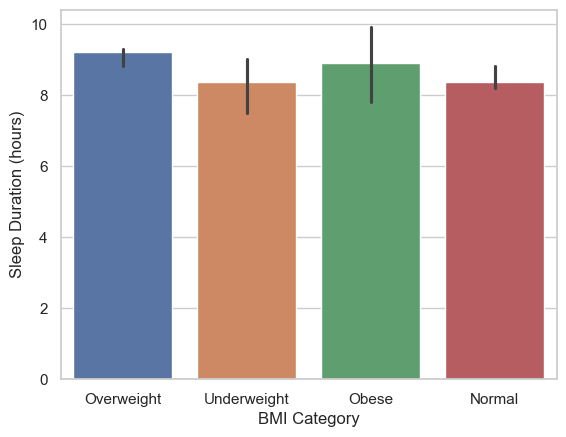

In [100]:
sns.set_theme(style="whitegrid")
sns.barplot(data=sleep_health_cleaned, x='BMI Category', y='Sleep Duration (hours)', 
            palette=sns.color_palette(), estimator=np.median, errorbar=('ci', 45), hue='BMI Category', legend=False)

From the diagram, we can see that higher BMI values tend to have higher sleep durations overall. This is an expected result as BMI is a measure of body fat percentage, and higher body fat percentage can lead to sleep apnea and other sleep disorders that can affect sleep duration.

Now, to further explore the relationship between age and sleep duration, we can perform a correlation analysis:

#### Correlation between Age and Sleep Duration:

Since our age span is large, we will seperate each age group and compare their sleep duration variations.

##### **Adult Age**:

<Axes: xlabel='Age', ylabel='Sleep Duration (hours)'>

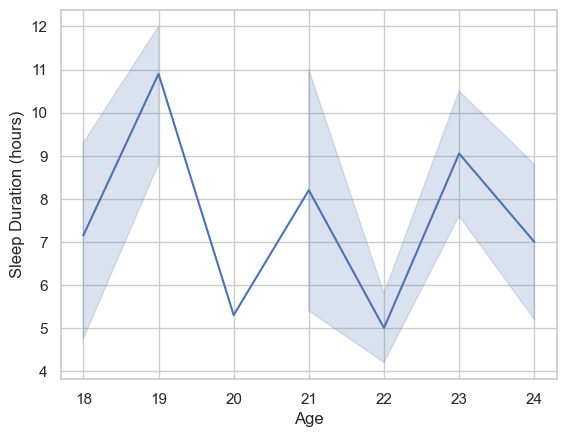

In [101]:
adult_age = sleep_health_cleaned.loc[(sleep_health_cleaned['Age'] >= 18) & (sleep_health_cleaned['Age'] < 25)]
sns.lineplot(data=adult_age, x='Age', y='Sleep Duration (hours)', legend=False, estimator=np.median)


#### **Middled-age group:**

<Axes: xlabel='Age', ylabel='Sleep Duration (hours)'>

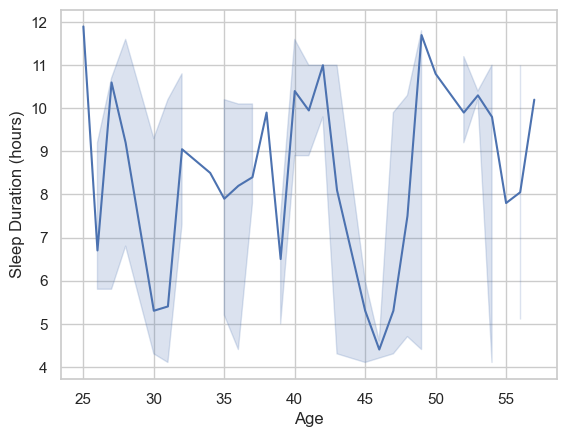

In [102]:
sns.lineplot(data=middled_age, x='Age', y='Sleep Duration (hours)', legend=False, estimator=np.median)

#### **Senior age**:

<Axes: xlabel='Age', ylabel='Sleep Duration (hours)'>

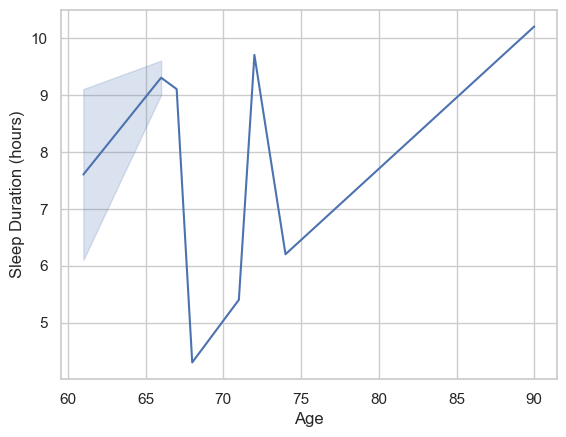

In [105]:
sns.lineplot(data=senior_age, x='Age', y='Sleep Duration (hours)', legend=False, estimator=np.median)